loading dataset...
...dataset loaded
starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized


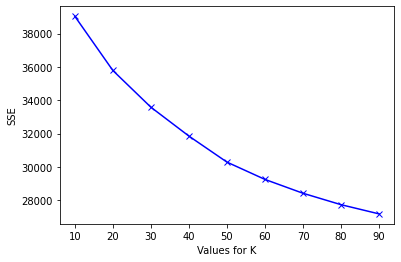

In [12]:
import  numpy as np
from sklearn.cluster import KMeans
from KmeanClustering import Kmeanclustering
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px

sse={}
X,df = Kmeanclustering.main()

for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=800).fit(X)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()), 'bx-')
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [4]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100)
vectoriser.fit_transform(df)

kmeans = KMeans(n_clusters=200)
kmeans.fit(X)
result = pd.concat([df,pd.DataFrame(X.toarray(),columns=vectoriser.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X)

/home/annabelle/Documents/Advanced_Machine_Learning_Project/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [5]:
result[['text', 'cluster']]

,text,cluster
0,usr we are,97
1,lookin for place to move full of crap!!,88
2,usr must b nice! wish i could go back2 bed,107
3,usr im in us in august.. she will not be aroun...,94
4,the defens rests. mayb for good.,54
...,...,...
49995,usr realli wish i was there!! so glad you had ...,117
49996,usr wow amaz pic! u have not age a bit! ..was ...,53
49997,usr an apolog if it's not someth she will like...,144
49998,"waddyaknow? qt cup have 1/4,1/2 etc on them-cb...",11


In [6]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='text' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [7]:
result_labelled[['text', 'cluster', 'label']]

,text,cluster,label
0,usr we are,97,are we
1,lookin for place to move full of crap!!,88,of
2,usr must b nice! wish i could go back2 bed,107,go
3,usr im in us in august.. she will not be aroun...,94,be will
4,the defens rests. mayb for good.,54,good
...,...,...,...
49995,usr realli wish i was there!! so glad you had ...,117,so your
49996,usr wow amaz pic! u have not age a bit! ..was ...,53,not was
49997,usr an apolog if it's not someth she will like...,144,like your
49998,"waddyaknow? qt cup have 1/4,1/2 etc on them-cb...",11,as


In [8]:
pd.pivot_table(result_labelled, index=['label'], values=['text'], aggfunc='count').sort_values(['text'], ascending=False).rename(columns={'text':'count of text'})

,count of text
label,
can not,1189
usr,1160
,1062
quot,950
do not,924
...,...
the usr,76
when will,65
need we,59
